<a href="https://colab.research.google.com/github/JulesDimanche/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Linear Regression model

In [ ]:
class Linear_Regression:
  def __init__(self,learning_rate,epoch):
    self.learning_rate=learning_rate
    self.epoch=epoch

  def fit(self,X,Y):
    self.X=X
    self.Y=Y
    self.m,self.n=X.shape
    self.b=0
    self.w=np.zeros(self.n)
    for i in range(self.epoch):
      self.update_weight()

  def update_weight(self):
    Y_predict=self.predict(self.X)
    dw=-(2*(self.X.T).dot(self.Y-Y_predict))/self.m
    db=-(2*(np.sum(self.Y-Y_predict)))/self.m
    self.w=self.w-(self.learning_rate*dw)
    self.b=self.b-(self.learning_rate*db)

  def predict(self,X):
    return X.dot(self.w)+self.b


In [ ]:
salary_data=pd.read_csv('/content/salary_data.csv')

In [ ]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [ ]:
x=salary_data.iloc[:,:-1].values
y=salary_data.iloc[:,1].values

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [ ]:
model=Linear_Regression(0.02,1000)

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
print(model.b)

23735.972514255136


In [ ]:
print(model.w)

[9534.93469214]


In [ ]:
predicted_val=model.predict(X_test)

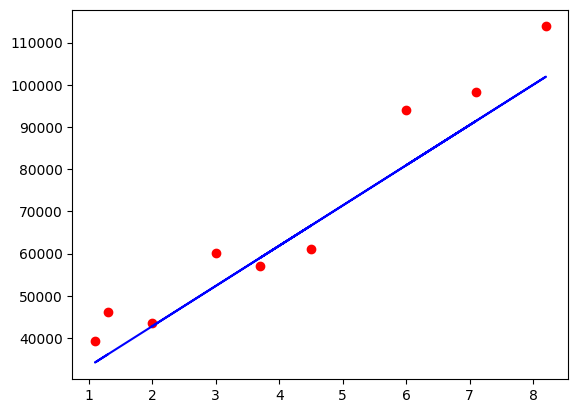

In [ ]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,predicted_val,color='blue')
plt.show()

Student preformance prediction

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
import kagglehub

student_data = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")

print("Path to dataset files:", student_data)

Path to dataset files: /kaggle/input/student-performance-multiple-linear-regression


In [ ]:
student_data=pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')

In [ ]:
student_data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
student_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [ ]:
student_data.shape

(10000, 6)

In [ ]:
student_data.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
label_encoder=LabelEncoder()

In [ ]:
student_data['Extracurricular Activities']=label_encoder.fit_transform(student_data['Extracurricular Activities'])

In [ ]:
x1.std()

np.float64(27.3843463772353)

In [ ]:
x1=student_data.iloc[:,:-1].values
y1=student_data.iloc[:,-1].values

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(x1)

StandardScaler()

In [ ]:
x1_scaler=scaler.transform(x1)

In [ ]:
x1_scaler.std()

np.float64(1.0)

In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1_scaler,y1,test_size=.1,random_state=2)

In [ ]:
model1=Linear_Regression(0.01,1000)

In [ ]:
model1.fit(x1_train,y1_train)

In [ ]:
predicted_1=model1.predict(x1_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y1_test,predicted_1)
mse

4.153839125544761